<a href="https://colab.research.google.com/github/luthfiyah1610/UAS-BengKod/blob/main/UAS_Capstone_BengKod_A11_2018_11399.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Luthfiyah Oktaviani Ulima Ruliff

NIM : A11.2018.11399

Kelas : Bengkel Koding DS-03

## 1. Pengumpulan Data

In [5]:
# Import Library yang diperlukan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [6]:
# Membaca Dataset

water_potability_df = pd.read_csv('https://drive.google.com/uc?id=1cWZzfVkEw3xMcIanmtb-xi-7nVBKjMRl')

In [7]:
water_potability_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## 2. Menelaah Data

In [8]:
# Menampilkan Informasi Data

water_potability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# Menampilkan Deskripsi Data

water_potability_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
# Menampilkan jumlah missing values di setiap kolom

water_potability_df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
# Menampilkan jumlah nilai unik di setiap kolom

water_potability_df.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


In [12]:
# Menampilkan type data tiap kolom

water_potability_df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


# 3. Validasi dan Visualisasi Data

## Missing Value

In [13]:
# Mengecek Missing Values

missing_values = water_potability_df.isnull().sum()
print("Missing Values :\n", missing_values)

Missing Values :
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [14]:
# Mengisi kolom numerik dengan mean

water_potability_df.fillna(water_potability_df.mean(), inplace=True)

In [15]:
water_potability_df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Outlier

In [16]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20): # memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th)
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values)
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality)

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi : {dataframe.shape[0]}")
    print(f"Jumlah variabel : {dataframe.shape[1]}")
    print(f"Kolom kategorikal : {len(cat_cols)}")
    print(f"Kolom Numerik : {len(num_cols)}")
    print(f"Kategori tapi kardinal : {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal : {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car)
    return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(water_potability_df)

Jumlah observasi : 3276
Jumlah variabel : 10
Kolom kategorikal : 1
Kolom Numerik : 9
Kategori tapi kardinal : 0
Numerik tapi kategorikal : 1


In [18]:
# Mengecek Outlier
# Membuat visualisasi boxplot (diagram kotak) untuk semua kolom numerik yang diberikan
def boxplot(dataframe, numeric_columns):

    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 # Menghitung Jumlah Baris Grafik
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) # Membuat grid subplots dengan ukuran yang sesuai

    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col]) # Iterasi Kolom Numerik untuk Membuat Boxplot
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    # Penentuan posisi subplot dalam grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) # Menghapus Grafik Kosong

    # Penyesuaian Layout
    plt.tight_layout()
    plt.show()

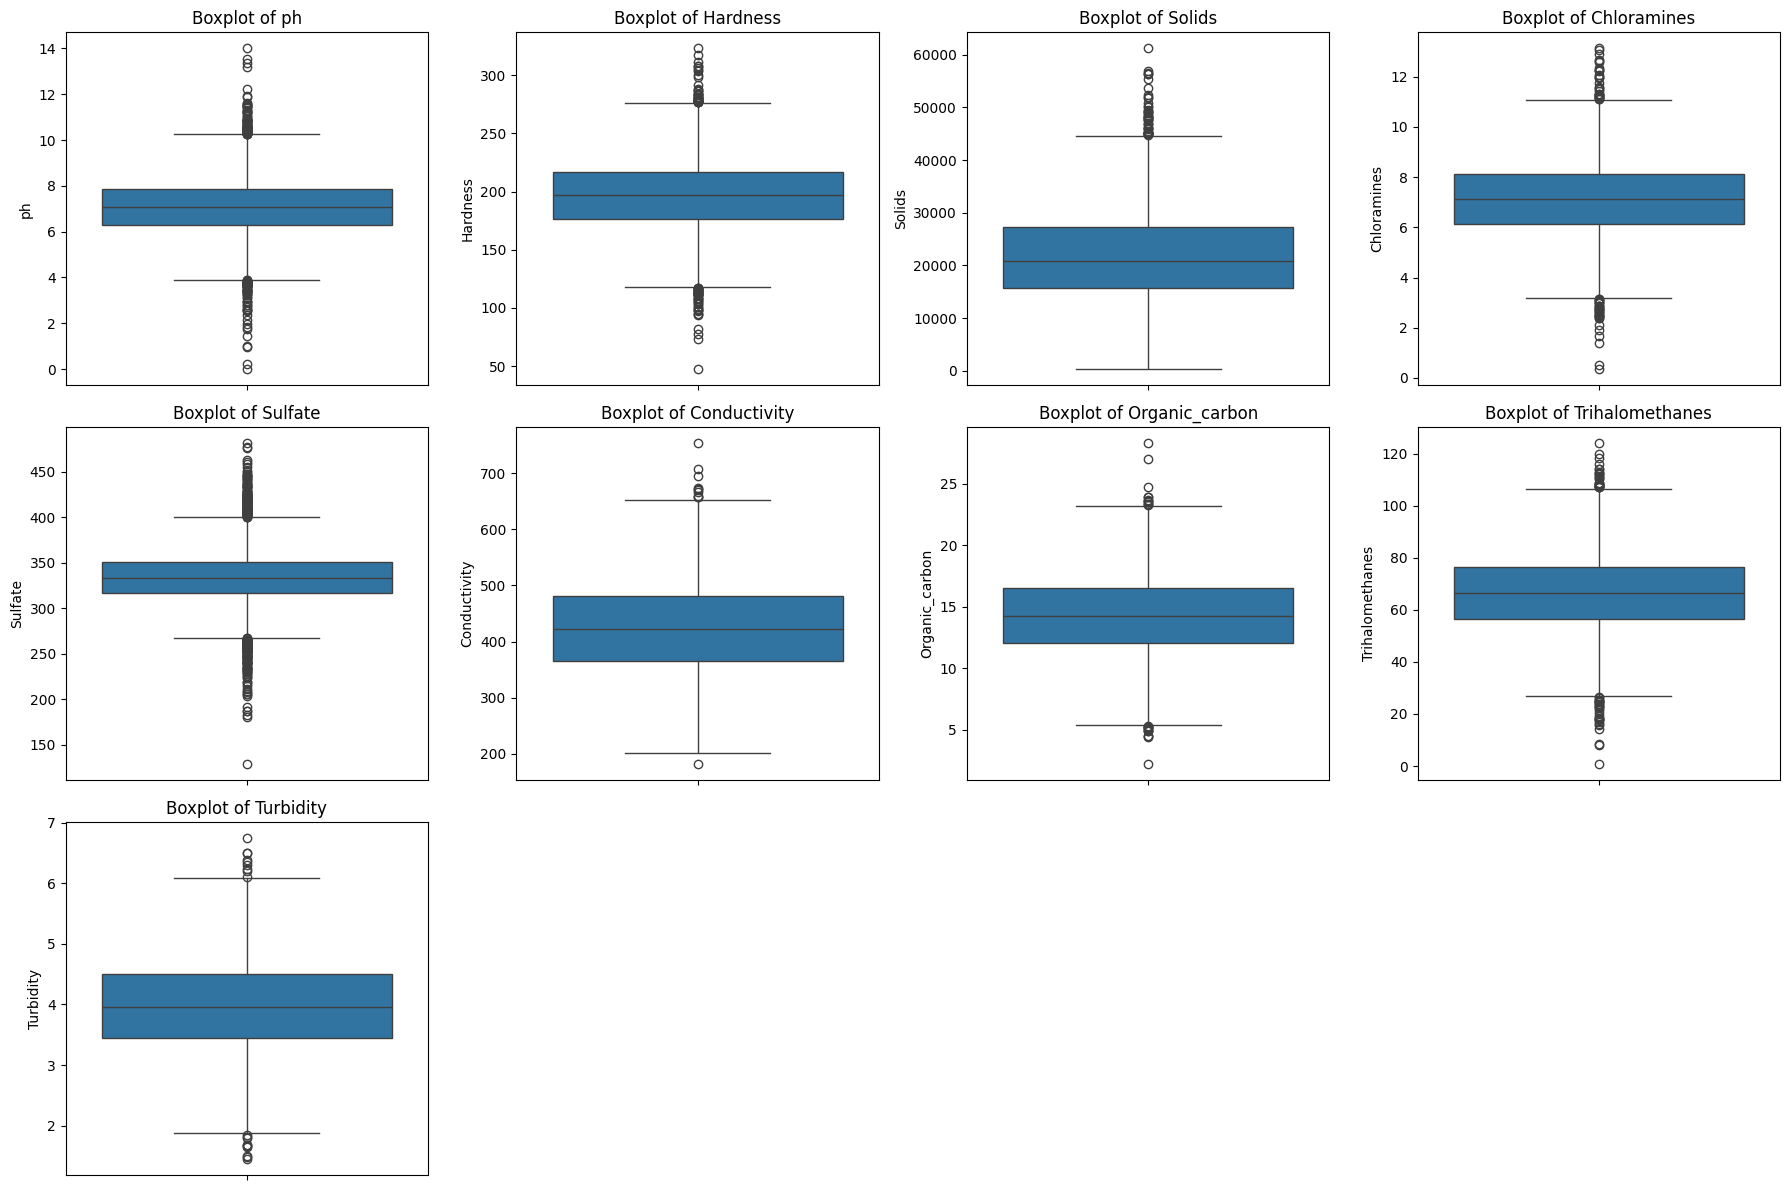

In [19]:
boxplot(water_potability_df, num_cols)

In [20]:
def detect_outlier_iqr_all_columns(df):

    outliers_dict = {}

    # Looping untuk setiap kolom numerik dalam DataFrame
    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()  # Mengambil data dari kolom dan menghapus nilai yang hilang
        data_sorted = sorted(data)  # Mengurutkan data untuk menghitung kuantil

        # Menghitung Q1, Q3, dan IQR
        q1 = np.percentile(data_sorted, 25)
        q3 = np.percentile(data_sorted, 75)
        IQR = q3 - q1

        # Menentukan batas bawah dan atas untuk outlier
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)

        # Mencari outlier dan menyimpannya ke dalam list
        outliers = [i for i in data_sorted if i < lwr_bound or i > upr_bound]

        # Jika ada outlier, tambahkan ke kamus outliers_dict
        if outliers:
            outliers_dict[col] = outliers

    return outliers_dict

In [21]:
outliers_found = detect_outlier_iqr_all_columns(water_potability_df)

for col, outliers in outliers_found.items():
    print(f"Outliers pada kolom {col}  (Jumlah : {len(outliers)})")

Outliers pada kolom ph  (Jumlah : 142)
Outliers pada kolom Hardness  (Jumlah : 83)
Outliers pada kolom Solids  (Jumlah : 47)
Outliers pada kolom Chloramines  (Jumlah : 61)
Outliers pada kolom Sulfate  (Jumlah : 264)
Outliers pada kolom Conductivity  (Jumlah : 11)
Outliers pada kolom Organic_carbon  (Jumlah : 25)
Outliers pada kolom Trihalomethanes  (Jumlah : 54)
Outliers pada kolom Turbidity  (Jumlah : 19)


## Resampling

Menggunakan metode Oversampling untuk menghindari model yang cenderung memprediksi kelas mayoritas dan mengabaikan kelas minoritas, yang kurang terwakili

In [22]:
from imblearn.over_sampling import SMOTE

X = water_potability_df.drop('Potability', axis=1)  # Fitur
y = water_potability_df['Potability']  # Target

smote = SMOTE(random_state=42)  # Inisialisasi SMOTE dengan random state
X_resampled, y_resampled = smote.fit_resample(X, y)  # Resampling data

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Potability'] = y_resampled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [23]:
# Sebelum resampling
before_resampling = water_potability_df['Potability'].value_counts()

# Setelah resampling
after_resampling = resampled_data['Potability'].value_counts()

In [24]:
comparison_df = pd.DataFrame({
    'Sebelum Resampling': before_resampling,
    'Setelah Resampling': after_resampling
})
comparison_df.index = ['Tidak Layak Minum (0)', 'Layak Minum (1)']

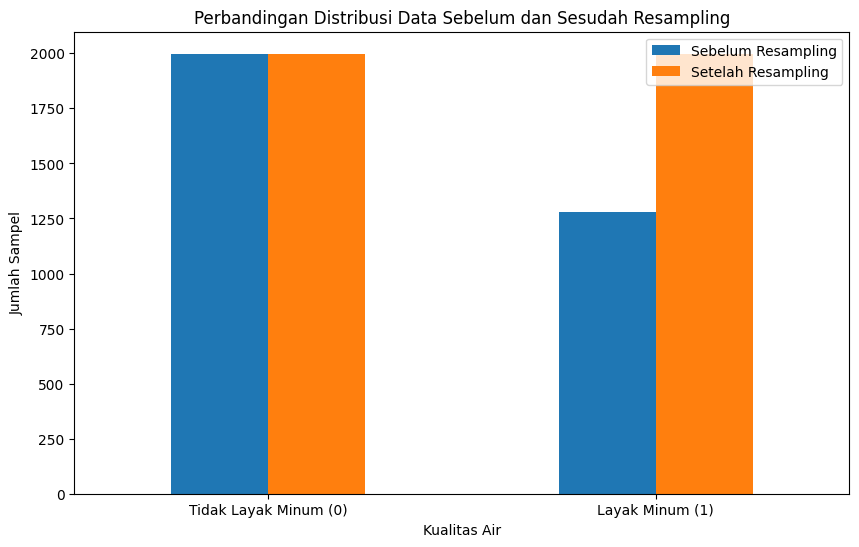

In [25]:
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Distribusi Data Sebelum dan Sesudah Resampling')
plt.xlabel('Kualitas Air')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# 4. Menentukan Objek Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Fitur (X)
X = water_potability_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

# Target (y)
y = water_potability_df['Potability']

In [28]:
# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Membersihkan Data

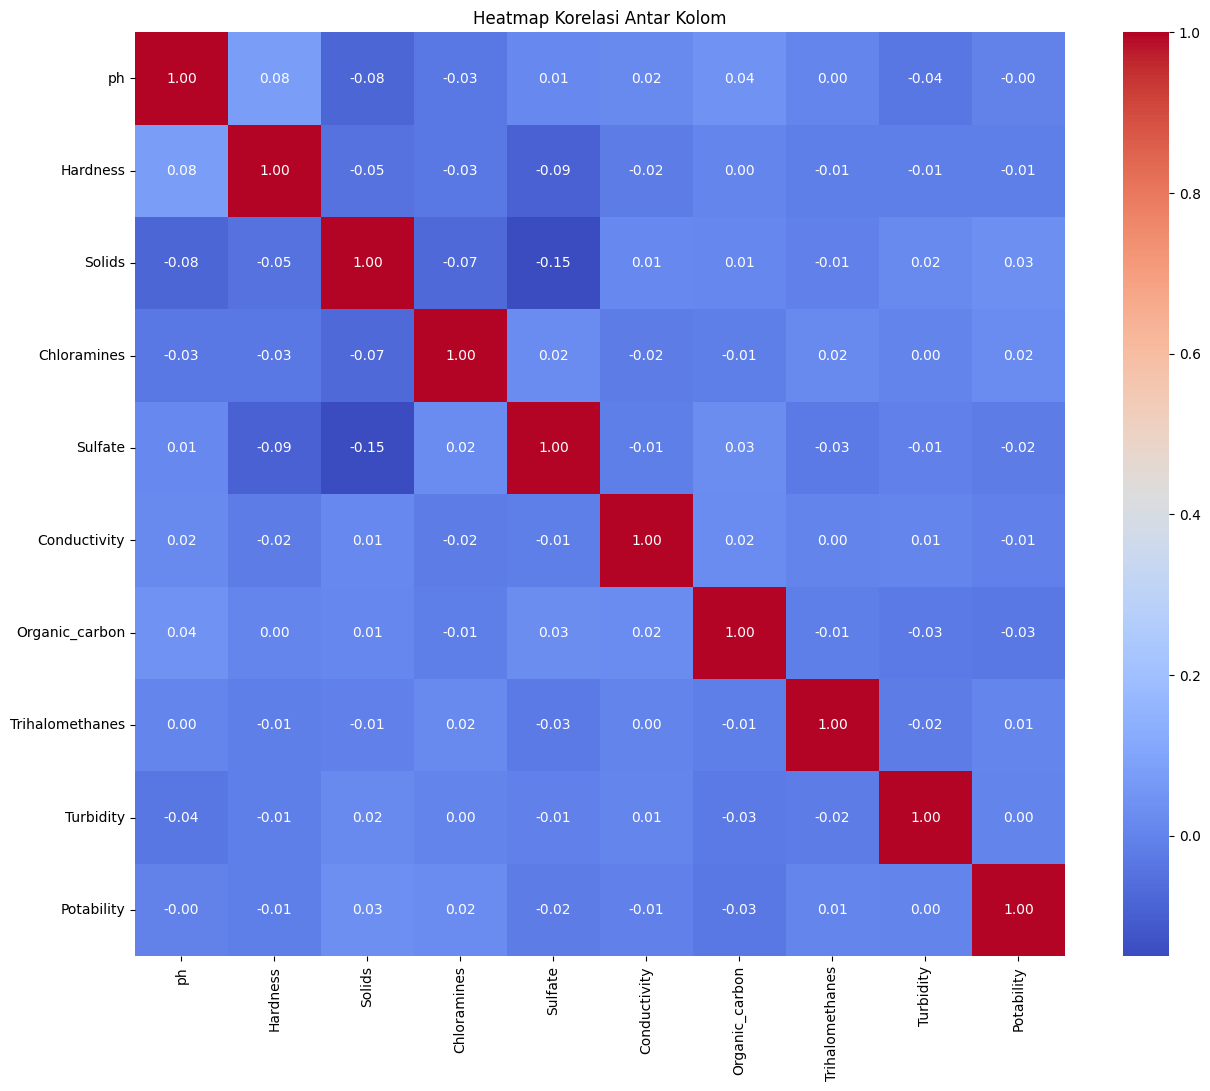

In [29]:
# Menghitung matriks korelasi
correlation = water_potability_df.corr()

# Membuat Heatmap
plt.figure(figsize=(15, 12))  # Mengatur size gambar
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

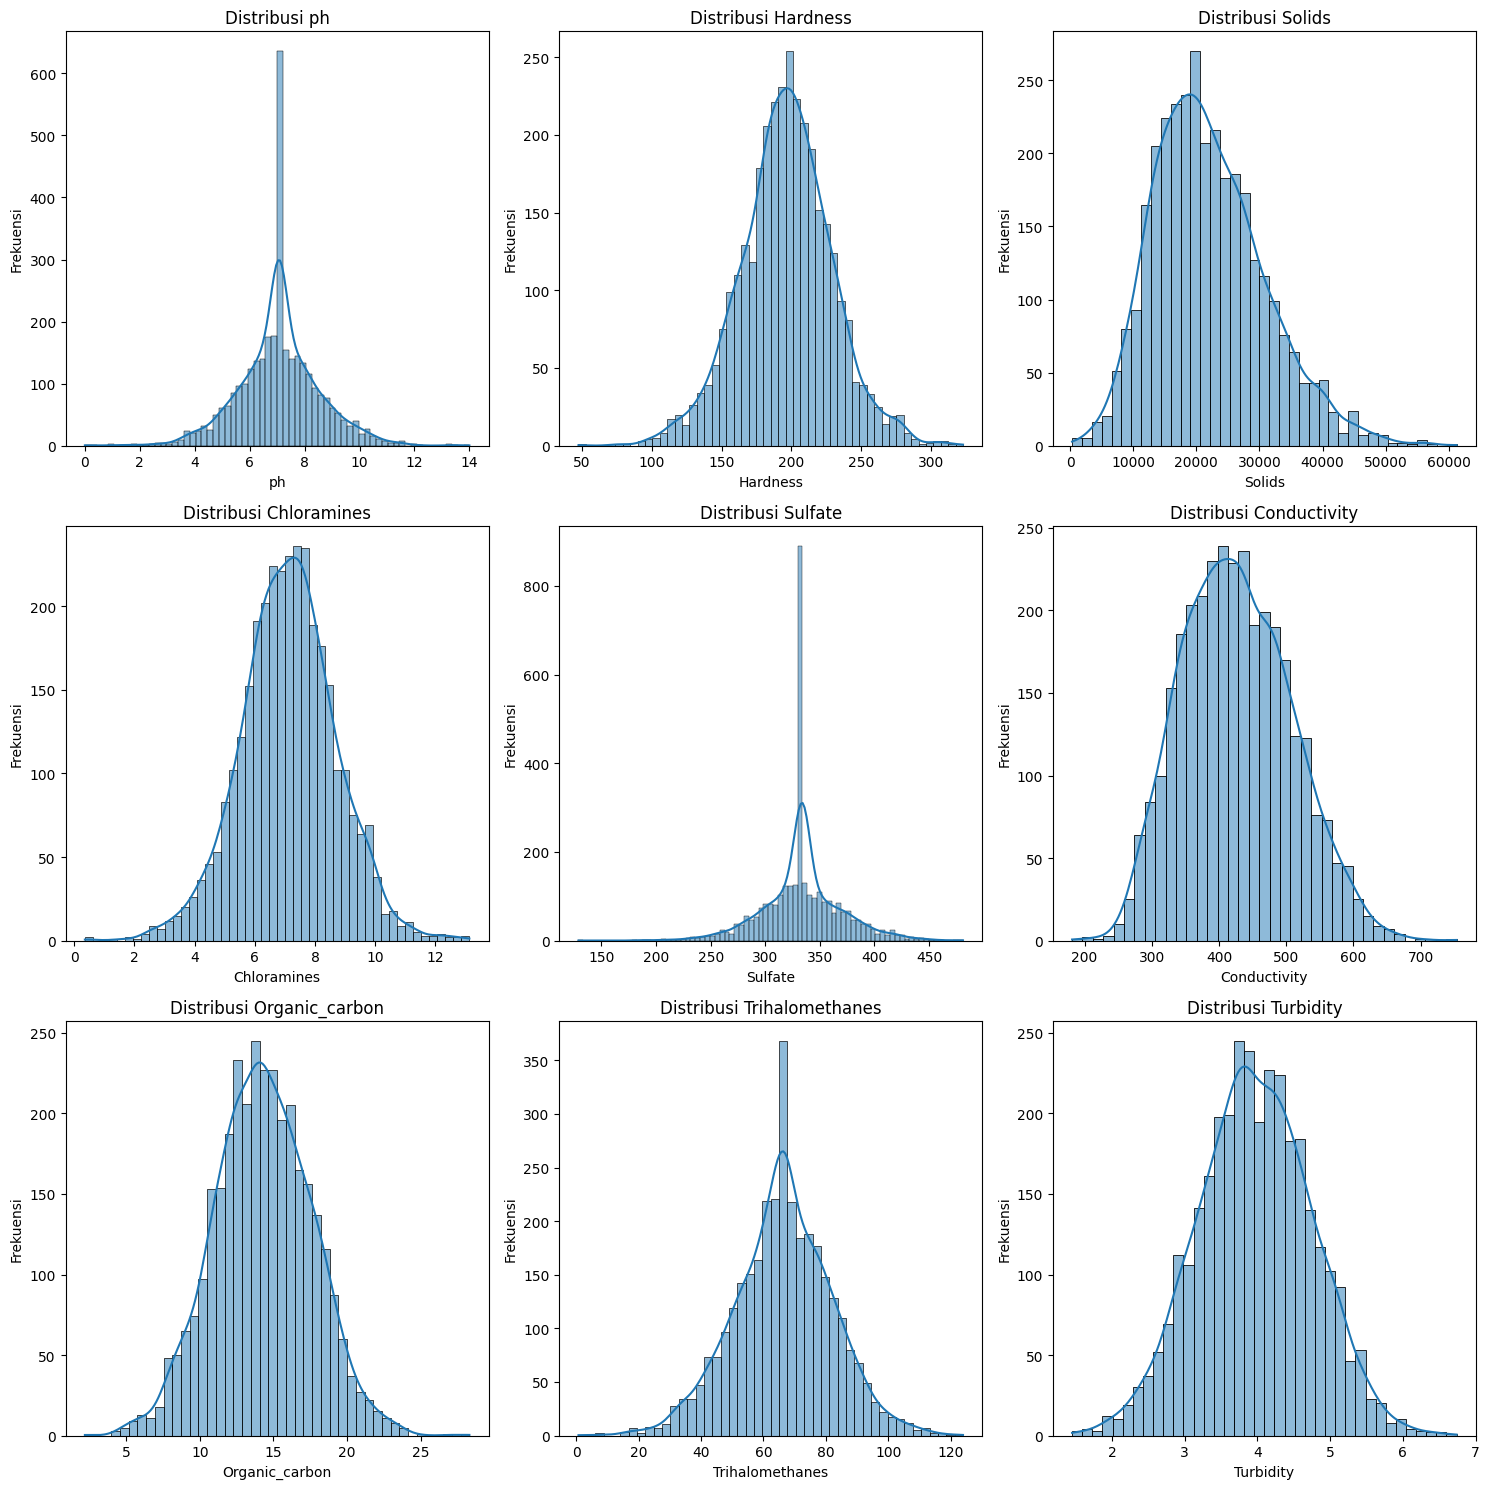

In [30]:
# Fitur yang ingin divisualisasikan
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 baris, 3 kolom

# Flatten axes untuk iterasi yang lebih mudah
axes = axes.flatten()

# Loop melalui setiap fitur dan buat histogram di subplot
for i, feature in enumerate(features):
    sns.histplot(data=water_potability_df, x=feature, kde=True, ax=axes[i])  # Buat histogram plot dengan seaborn di subplot
    axes[i].set_title(f'Distribusi {feature}')  # Atur judul plot
    axes[i].set_xlabel(feature)  # Atur label sumbu x
    axes[i].set_ylabel('Frekuensi')  # Atur label sumbu y

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()  # Menyesuaikan jarak antar subplot
plt.show()


# 6. Kontruksi Data

Salah satu tujuan dari tahapan konstruksi data yaitu untuk menyesuaikan semua tipe data yang terdapat dalam dataset. Namun, pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

# 7. Pemodelan

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
clean_classifier_nb = GaussianNB()
clean_classifier_nb .fit(X_train, y_train)

GaussianNB()

In [33]:
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt .fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf .fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [36]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [37]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Mengevaluasi Model Naive Bayes
print("\nNaive Bayes Model :")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
print("Accuracy:",accuracy_nb)
print("Classification Report :")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model :
Accuracy: 0.636
Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.89      0.75       617
           1       0.53      0.21      0.30       366

    accuracy                           0.64       983
   macro avg       0.59      0.55      0.53       983
weighted avg       0.61      0.64      0.59       983



In [38]:
evaluation(y_test,y_pred_nb)

{'accuracy': 0.636, 'recall': 0.636, 'F1 score': 0.586, 'Precision score': 0.607}


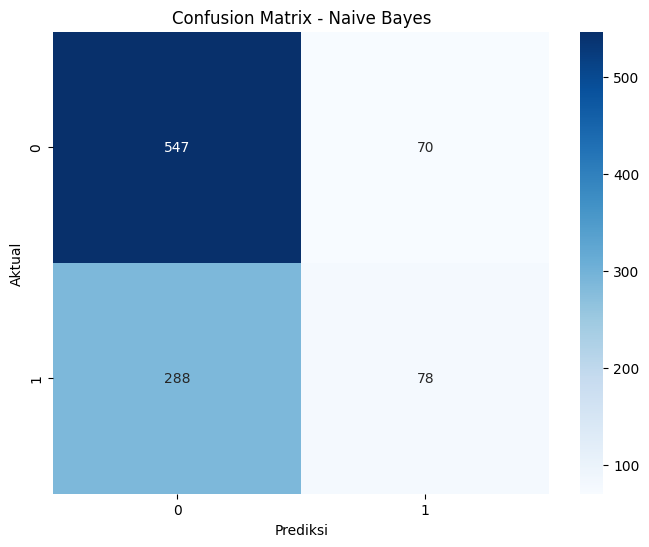

In [39]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Membuat Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [40]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Mengevaluasi Model Decision Tree
print("\nDecision Tree Model :")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report :")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model :
Accuracy: 0.564
Classification Report :
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       617
           1       0.43      0.49      0.46       366

    accuracy                           0.56       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.58      0.56      0.57       983



In [41]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.564, 'recall': 0.564, 'F1 score': 0.569, 'Precision score': 0.578}


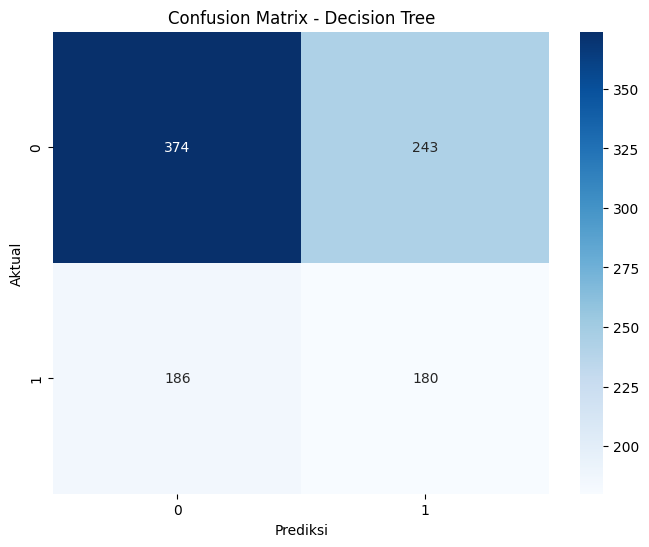

In [42]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Membuat Visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [43]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Mengevaluasi Model Random Forest
print("\nRandom Forest Model :")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report :")
print(classification_report(y_test, y_pred_rf))


Random Forest Model :
Accuracy: 0.689
Classification Report :
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983



In [44]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.689, 'recall': 0.689, 'F1 score': 0.662, 'Precision score': 0.681}


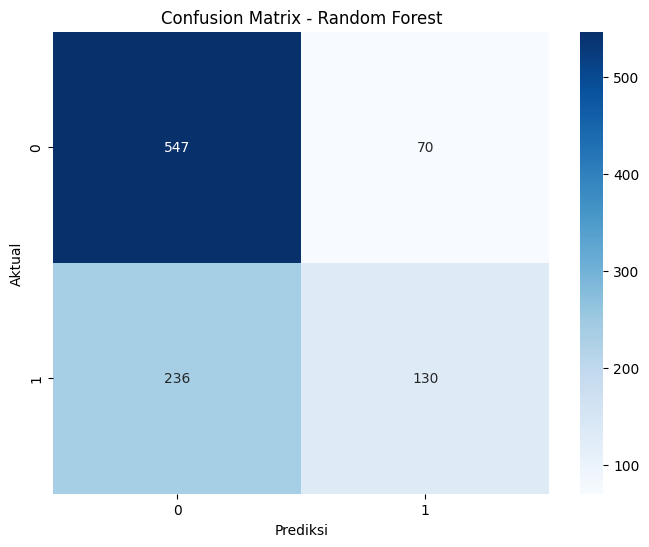

In [45]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Membuat visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# 8. Evaluasi

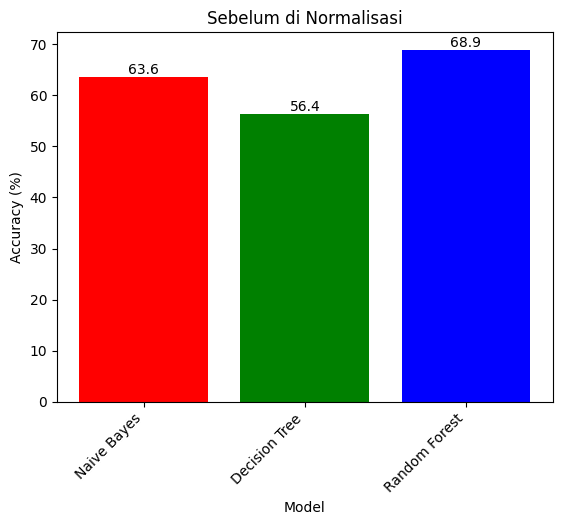

In [46]:
model_comp = pd.DataFrame({'Model': ['Naive Bayes','Decision Tree','Random Forest'], 'Accuracy': [accuracy_nb*100,
                    accuracy_dt*100,accuracy_rf*100]})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Sebelum di Normalisasi')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


## Normalisasi Data

In [47]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan fit dan transform pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan transform pada data testing (menggunakan parameter yang dipelajari dari data training)
X_test_scaled = scaler.transform(X_test)

In [48]:
# --- Sebelum Normalisasi ---
# Akurasi model sebelum normalisasi (sudah dihitung sebelumnya)
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)

# --- Setelah Normalisasi ---
# Prediksi model setelah normalisasi (sudah dihitung sebelumnya)
y_pred_nbN = clean_classifier_nb.predict(X_test_scaled)
y_pred_dtN = clean_classifier_dt.predict(X_test_scaled)
y_pred_rfN = clean_classifier_rf.predict(X_test_scaled)

# Akurasi model setelah normalisasi
accuracy_nbN = round(accuracy_score(y_test, y_pred_nbN), 3)
accuracy_dtN = round(accuracy_score(y_test, y_pred_dtN), 3)
accuracy_rfN = round(accuracy_score(y_test, y_pred_rfN), 3)

# --- Perbandingan Akurasi ---
# Membuat DataFrame untuk perbandingan
data = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Akurasi Sebelum Normalisasi': [accuracy_nb, accuracy_dt, accuracy_rf],
    'Akurasi Setelah Normalisasi': [accuracy_nbN, accuracy_dtN, accuracy_rfN]
}

comparison_df = pd.DataFrame(data)

# Menampilkan DataFrame
print(comparison_df)

           Model  Akurasi Sebelum Normalisasi  Akurasi Setelah Normalisasi
0    Naive Bayes                        0.636                        0.372
1  Decision Tree                        0.564                        0.372
2  Random Forest                        0.689                        0.372


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


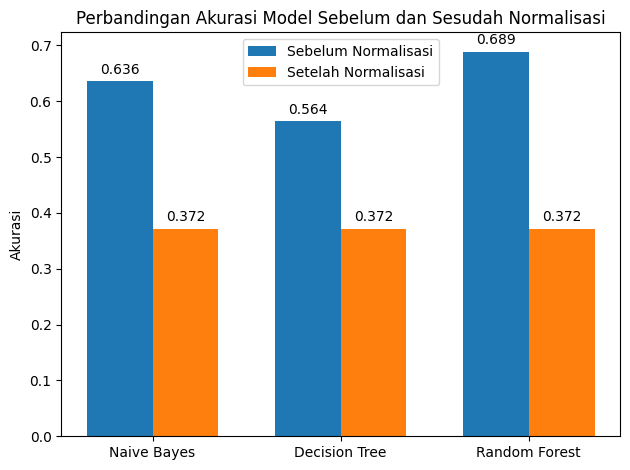

In [49]:
models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
before_normalization = [accuracy_nb, accuracy_dt, accuracy_rf]
after_normalization = [accuracy_nbN, accuracy_dtN, accuracy_rfN]

# Menentukan posisi bar
x = np.arange(len(models))
width = 0.35

# Membuat bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_normalization, width, label='Sebelum Normalisasi')
rects2 = ax.bar(x + width/2, after_normalization, width, label='Setelah Normalisasi')

# Menambahkan label, judul, dan legend
ax.set_ylabel('Akurasi')
ax.set_title('Perbandingan Akurasi Model Sebelum dan Sesudah Normalisasi')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Menambahkan label nilai di atas setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Menampilkan plot
fig.tight_layout()
plt.show()

# Kesimpulan

## Tingkat Akurasi Setiap Algoritma
Algoritma Akurasi (Sebelum Normalisasi) Akurasi (Setelah Normalisasi)

- Naive Bayes 63.6% (sebelum) 37.2% (sesudah)
- Decision Tree 56.4% (sebelum) 37.2% (sesudah)
- Random Forest 68.9% (sebelum) 37.2% (sesudah)

## Keunggulan dan Keterbatasan
- Naive Bayes memiliki keunggulan yaitu sederhana dan efektif untuk dataset dimensi tinggi. Sedangkan keterbatasan yang dimiliki yaitu asumsi independensi fitur dan sensitif terhadap fitur tidak relevan.

- Decision Tree memiliki keunggulan yaitu mudah diinterpretasi, menangani data kategorikal dan numerik. Sedangkan keterbatasan yang dimiliki yaitu rentan overfitting dan tidak stabil.

- Random Forest memiliki keunggulan yaitu mengurangi overfitting, robust, menangani data hilang dan outlier. Sedangkan keterbatasan yang dimiliki yaitu kompleks dan waktu pelatihan lama.

## Rekomendasi Algoritma
Algoritma Random Forest direkomendasikan karena akurasinya hampir mencapai 69%, algoritma ini memiliki akurasi paling tinggi dibandingkan dengan Naive Bayes dan Decision Tree. Robust dan Stabil, lebih handal dalam memprediksi data baru dan tidak mudah terpengaruh outlier. Generalisasi Baik, dapat diterapkan pada dataset lain dengan karakteristik serupa.

In [50]:
import pickle

In [51]:
filename = 'model_naive_bayes.pkl'
pickle.dump(clean_classifier_nb, open(filename, 'wb'))

In [52]:
filename = 'model_decision_tree.pkl'
pickle.dump(clean_classifier_dt, open(filename, 'wb'))

In [53]:
filename = 'model_random_forest.pkl'
pickle.dump(clean_classifier_rf, open(filename, 'wb'))